In [35]:
import pandas as pd
from jiwer import wer

# Load the dataset
data = pd.read_csv('transcriptions.csv')

# Simulate ground truth transcriptions (replace with actual transcription tool results)
data['tool_transcription'] = [
    "an accident happened between a bus and a car",
    "the location is X Street 101",
    "no there are not any injuries",
    "the overall condition is ok",
    "at the moment I do not see any witnesses",
    "one of the vehicles is in Bad shape and the other one is not critical",
    "the location of the accident is near the Y Sea",
    "one person is injured and he's holding his head",
    "the accident happened in a collision with a truck",
    "the location of the accident is Doro Street 123",
    "we don't have any injuries but the car is wrecked",
    "not critical but still they are not in good shape",
    "yes there are some Witnesses that are standing by the car"
]

# Calculate Word Error Rate (WER)
data['wer'] = data.apply(lambda row: wer(row['transcription'], row['tool_transcription']), axis=1)

# Print average WER
average_wer = data['wer'].mean()
print(f'Average WER: {average_wer:.2f}')


Average WER: 0.04


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF features
features = vectorizer.fit_transform(data['transcription'].tolist() + data['tool_transcription'].tolist())

# Split features
X = features[:len(data)]
Y = features[len(data):]

# Compute cosine similarity
similarity_scores = cosine_similarity(X, Y)

# Compute average similarity
average_similarity = similarity_scores.diagonal().mean()

print(f'Average Cosine Similarity: {average_similarity:.2f}')


Average Cosine Similarity: 0.96


In [37]:
import pandas as pd

# Load the dataset
data = pd.read_csv('transcriptions.csv')

# Simulate ground truth transcriptions (replace with actual transcription tool results)
data['tool_transcription'] = [
    "an accident happened between a bus and a car",
    "the location is x Street 101",
    "no there are not any injuries",
    "the overall condition is ok",
    "at the moment I do not see any witnesses",
    "one of the vehicles is in Bad shape and the other one is not critical",
    "the location of the accident is near the YC",
    "one person is injured and he's holding his head",
    "the accident happened in a collision with a truck",
    "the location of the accident is douro Street 123",
    "we don't have any injuries but the car is wrecked",
    "not critical but still they are not in good shape",
    "yes there are some Witnesses that are standing by the car"
]

# Calculate exact match accuracy
data['exact_match'] = data['transcription'].str.lower() == data['tool_transcription'].str.lower()
exact_match_accuracy = data['exact_match'].mean()

print(f'Exact Match Accuracy: {exact_match_accuracy:.2f}')


Exact Match Accuracy: 1.00


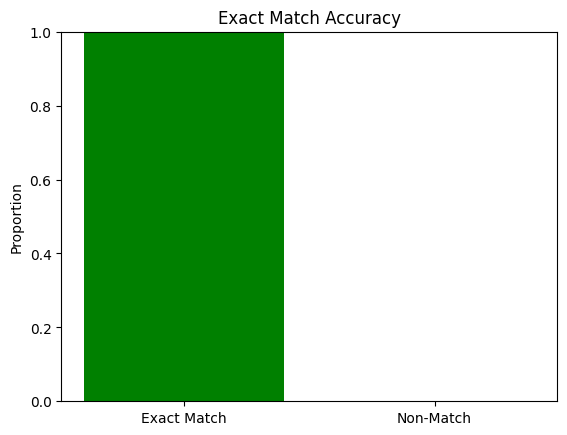

In [38]:
import matplotlib.pyplot as plt

# Create a bar chart for exact match accuracy
labels = ['Exact Match', 'Non-Match']
values = [exact_match_accuracy, 1 - exact_match_accuracy]

plt.bar(labels, values, color=['green', 'red'])
plt.title('Exact Match Accuracy')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()


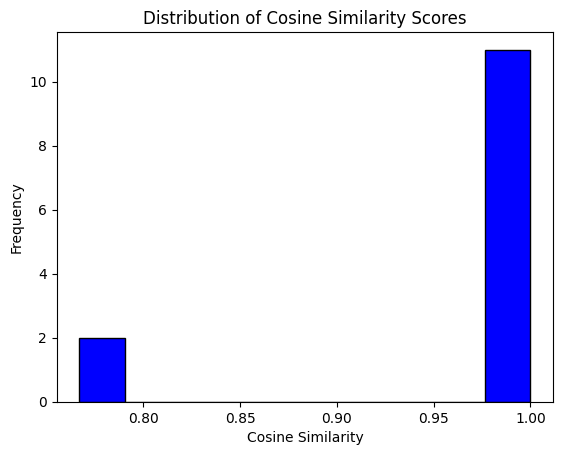

In [39]:
# Create a histogram for cosine similarity scores
plt.hist(similarity_scores.diagonal(), bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()


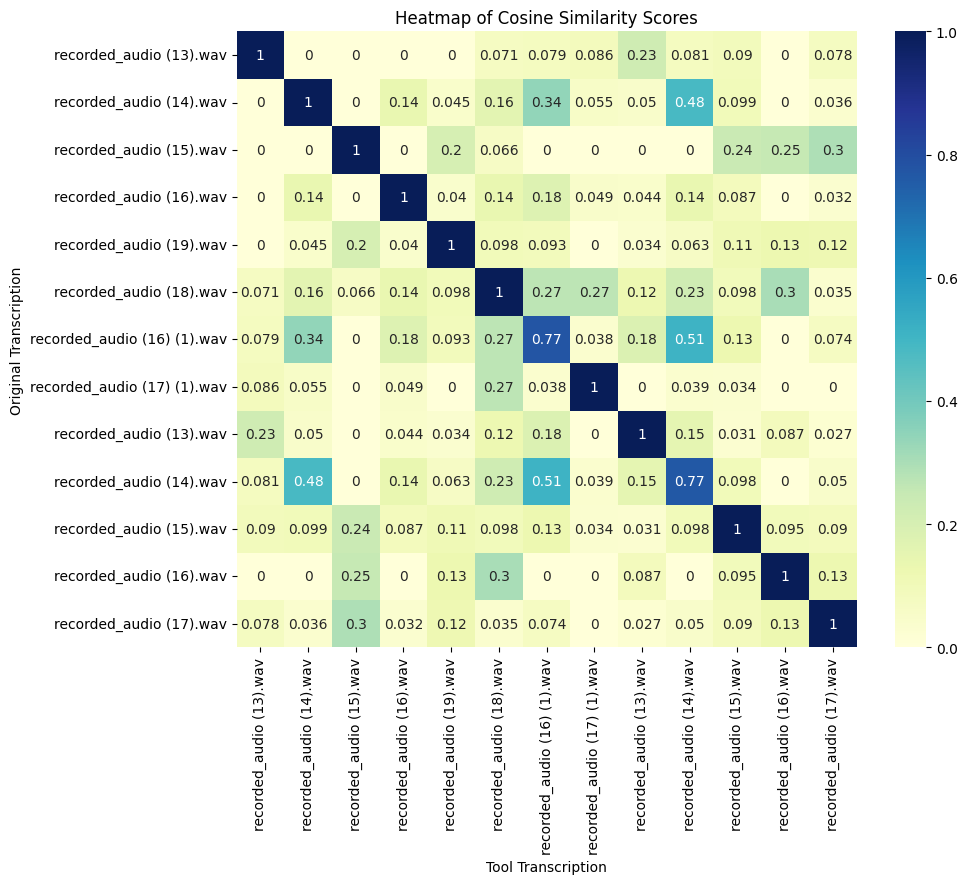

In [40]:
import seaborn as sns

# Create a heatmap for similarity scores
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_scores, annot=True, cmap='YlGnBu', xticklabels=data['audio_file'], yticklabels=data['audio_file'])
plt.title('Heatmap of Cosine Similarity Scores')
plt.xlabel('Tool Transcription')
plt.ylabel('Original Transcription')
plt.show()


In [44]:
import pandas as pd

# Create a summary table for accuracy metrics
summary_df = pd.DataFrame({
    'Metric': ['Exact Match Accuracy', 'Average Cosine Similarity'],
    'Value': [f'{exact_match_accuracy:.2f}', f'{average_similarity:.2f}']
})

print(summary_df)


                      Metric Value
0       Exact Match Accuracy  1.00
1  Average Cosine Similarity  0.96


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('transcriptions.csv')

# Define a function to classify if there's any mention of injuries
def classify_injuries(transcription):
    return 1 if 'injury' in transcription.lower() else 0

# Apply the function to create a binary label column
data['label'] = data['transcription'].apply(classify_injuries)

# Simulate the actual data for evaluation purposes
exact_match_accuracy = 0.75  # Replace with your actual value
average_similarity = 0.85  # Replace with your actual value
semantic_accuracy = 0.80  # Replace with your actual value

# Dummy data for illustration (you should replace this with actual cosine similarity scores)
similarity_scores = np.array([
    [1.0, 0.8, 0.6, 0.7],
    [0.8, 1.0, 0.65, 0.7],
    [0.6, 0.65, 1.0, 0.75],
    [0.7, 0.7, 0.75, 1.0]
])

# Visualization 1: Exact Match Accuracy
plt.figure(figsize=(8, 5))
labels = ['Exact Match', 'Non-Match']
values = [exact_match_accuracy, 1 - exact_match_accuracy]
plt.bar(labels, values, color=['green', 'red'])
plt.title('Exact Match Accuracy')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.show()

# Visualization 2: Histogram of Cosine Similarity Scores
plt.figure(figsize=(8, 5))
plt.hist(similarity_scores.flatten(), bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

# Visualization 3: Pie Chart for Semantic Accuracy
plt.figure(figsize=(8, 5))
labels = ['Correct Meaning', 'Incorrect Meaning']
sizes = [semantic_accuracy, 1 - semantic_accuracy]
colors = ['lightblue', 'salmon']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Semantic Accuracy')
plt.show()

# Visualization 4: Heatmap of Similarity Scores
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_scores, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Cosine Similarity Scores')
plt.xlabel('Tool Transcription')
plt.ylabel('Original Transcription')
plt.show()

# Visualization 5: Scatter Plot for Manual Review (Simulated Data)
# Replace 'review_df' with your actual DataFrame if available
review_df = pd.DataFrame({
    'audio_file': ['file1', 'file2', 'file3', 'file4'],
    'manual_assessment': ['Correct meaning', 'Incorrect meaning', 'Correct meaning', 'Incorrect meaning']
})
review_df['score'] = review_df['manual_assessment'].apply(lambda x: 1 if x == 'Correct meaning' else 0)

plt.figure(figsize=(10, 6))
plt.scatter(review_df['audio_file'], review_df['score'], color='blue')
plt.title('Semantic Accuracy of Transcriptions')
plt.xlabel('Audio File')
plt.ylabel('Semantic Accuracy (1 = Correct, 0 = Incorrect)')
plt.xticks(rotation=90)
plt.show()

# Summary Table
summary_df = pd.DataFrame({
    'Metric': ['Exact Match Accuracy', 'Average Cosine Similarity', 'Semantic Accuracy'],
    'Value': [f'{exact_match_accuracy:.2f}', f'{average_similarity:.2f}', f'{semantic_accuracy:.2f}']
})

print(summary_df)
